In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

In [3]:
import networkx as nx

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, from_networkx

G = nx.Graph()

G.add_edges_from([('A','B'),('A','G'),('A','H'),('B','C'),('C','D'),('C','E'),('D','F'),
                  ('F','G'),('F','I'),('G','I'),('G','H'),('H','A')])

plot = figure(title="Networkx Integration Demonstration", x_range=(-3,3), y_range=(-3,3))

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_notebook()
show(plot)


Loading BokehJS ...

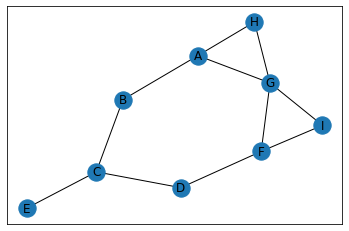

In [4]:
plot_graph(G)

## Degree Distributions

The **degree** of a node in an undirected graph is the number of neighbors it has.

The **degree distribution** of a graph is the probabiity distribution of the degrees over the entire network.

The degree distribution, $P(k)$, of this network has the following values:

$P(1) = ^1/_9, P(2) = ^4/_9, P(3) = ^1/_3, P(4) = ^1/_9$

In [5]:
degrees = G.degree()

In [6]:
dict(degrees).values()

dict_values([3, 2, 4, 2, 3, 2, 1, 3, 2])

In [7]:
degree_values = sorted(set(dict(degrees).values()))
histogram = [list(dict(degrees).values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

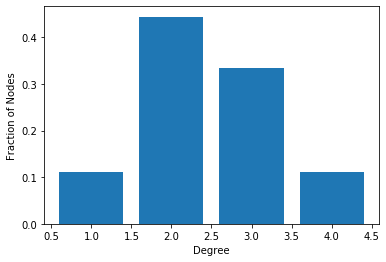

In [8]:
plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

### In-Degree Distributions

The **in-degree** of a node in a directed graph is the number of in-links it has.

The in-degree distribution, $P_{in}(k)$, of this network has the following values:

$P_{in}(0) = ^2/_9, P_{in}(1) = ^4/_9, P_{in}(2) = ^2/_9, P_{in}(3) = ^1/_9$

In [9]:
DG = nx.DiGraph()

DG.add_edges_from([('A','B'),('A','G'),('A','H'),('B','C'),('C','D'),('C','E'),('D','F'),
                  ('F','G'),('F','I'),('G','I'),('G','H'),('H','A')])

plot = figure(title="Networkx Integration Demonstration", x_range=(-3,3), y_range=(-3,3))

graph = from_networkx(DG, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_notebook()
show(plot)

Loading BokehJS ...

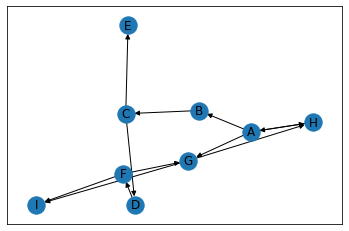

In [10]:
plot_graph(DG)

In [11]:
in_degrees = DG.in_degree()
in_degree_values = sorted(set(dict(in_degrees).values()))
histogram = [list(dict(in_degrees).values()).count(i)/float(nx.number_of_nodes(DG)) for i in in_degree_values]

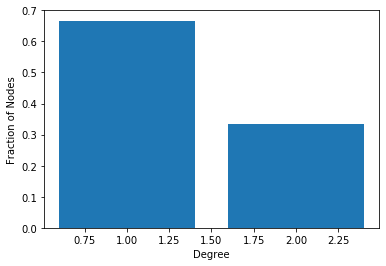

In [12]:
plt.bar(in_degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

Degree distribution looks like a straight line when on a log-log scale. **Power law**: $P(k) = Ck^{-\alpha}$, where $\alpha$ and $C$ are constants.

Networks with power law distribution have many nodes with small degree and a few nodes with very large degree.

What could explain power law degree distribution we observe in many networks?

Can we find a set of basic assumptions that explain this phenomenon?

### Preferential Attachment Model

* Start with two nodes connected by an edge
* At each time step, add a new node with an edge connecting it to an existing node
* Choose the node to connect to at random with probability proportional to each node's degree
* The probability of connecting to a node $u$ of degree $k_u$ is $^{k_u}/_{\sum_j{k_j}}$

### Preferential Attachment in NetworkX
*barabasi_albert_graph(n,m)* returns a network with $n$ nodes. Each new node attaches to $m$ existing nodes according to the Preferential Attachment model.

In [13]:
B = nx.barabasi_albert_graph(1000000, 1)
degrees = B.degree()
degree_values = sorted(set(dict(degrees).values()))
histogram = [list(dict(degrees).values()).count(i)/float(nx.number_of_nodes(B)) for i in degree_values]

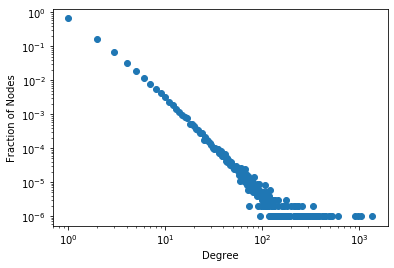

In [14]:
plt.plot(degree_values, histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Clustering Coefficient

**Local clustering coefficient of a node**: Fraction of pairs of the node's friends that are friends with each other.

### Path Length and Clustering

Social networks tend to have high clustering coefficient and small average path length. Can we think of a network generative model that has these two properties?

How about the Preferential Attachment model?

In [15]:
C = nx.barabasi_albert_graph(1000, 4)
nx.average_clustering(C)

0.03812942695040784

In [16]:
nx.average_shortest_path_length(C)

3.1715595595595594

What if we vary the number of nodes $(n)$ or the number of edges per new node $(m)$?

Small average shortest path: high degree nodes act as hubs and connect many pairs of nodes.

### Small World Model

**Motivation**: real networks exhibit high clustering coefficient and small average shortest paths. Can we think of a model that achieves both of these properties?

Small-world model:
* Start witha ring of $n$ nodes, where each node is connected to its $k$ nearest neighbors
* Fix a parameter $p \in$ [0,1]
* Consider each edge $(u,v)$. With probability $p$, select a node $w$ at random and rewire the edge $(u,v)$ so it becomes $(u,w)$

**Regular Lattice** $(p=0)$: no edge is rewired

**Random Network**: $(p=1)$: all edges are rewired

**Small World Network**: $(0<p<1)$: some edges are rewired. Network conserves some local structure but has some randomness.

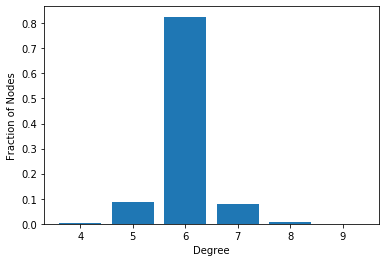

In [18]:
W = nx.watts_strogatz_graph(1000,6,0.04)
degrees = W.degree()
degree_values = sorted(set(dict(degrees).values()))
histogram = [list(dict(degrees).values()).count(i)/float(nx.number_of_nodes(W)) for i in degree_values]
plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

Variants of the small world model in NetworkX:
* Small world networks can be disconnected, which is sometime undesirable

*connected_watts_strogatx_graph(n,k,p,t)* runs *watts_strogatx_graph(n,k,p)* up to $t$ times, untill it returns a connected smal world network.

* *newmann_watts_strogatz_graph(n,k,p)* runs a model similar to the small world model, but rather than rewiring edges, new edges are added with probability $p$

## Links Prediction

What new edges are likely to form in this network?

Given a pair of nodes, how to assess whether the are likely to connect?

**Triadic Closure**: the tendency for people who share connections in a social network to become connected.

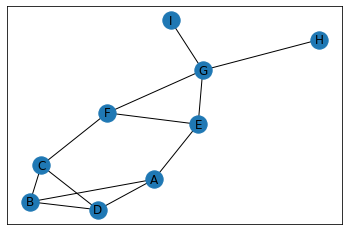

In [19]:
L = nx.Graph()
L.add_edges_from([('A','B'),('A','D'),('A','E'),('B','C'),('B','D'),('C','D'),('C','F'),
                  ('E','F'),('E','G'),('F','G'),('G','H'),('G','I')])
plot_graph(L)

In [20]:
plot = figure(title="Networkx Integration Demonstration", x_range=(-3,3), y_range=(-3,3))

graph = from_networkx(L, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_notebook()
show(plot)

Loading BokehJS ...

### Measure I: Common Neighbors

The number of common neighbors of nodes $X$ and $Y$ is

$comm\_neigh(X,Y) = |N(X) \cap N(Y)|$

where $N(X)$ is the set of neighbors of node $X$

In [22]:
list(nx.common_neighbors(L, 'A', 'C'))

['B', 'D']

In [31]:
common_neighbors = [(e[0], e[1], len(list(nx.common_neighbors(L, e[0], e[1])))) for e in nx.non_edges(L)]
common_neighbors

[('H', 'D', 0),
 ('H', 'I', 1),
 ('H', 'F', 1),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('H', 'E', 1),
 ('D', 'E', 1),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('D', 'F', 1),
 ('I', 'F', 1),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'A', 0),
 ('I', 'E', 1),
 ('F', 'A', 1),
 ('F', 'B', 1),
 ('B', 'E', 1),
 ('B', 'G', 0),
 ('G', 'C', 1),
 ('G', 'A', 1),
 ('C', 'A', 2),
 ('C', 'E', 1)]

In [32]:
sorted(common_neighbors, key=lambda tup: tup[2], reverse=True)

[('C', 'A', 2),
 ('H', 'I', 1),
 ('H', 'F', 1),
 ('H', 'E', 1),
 ('D', 'E', 1),
 ('D', 'F', 1),
 ('I', 'F', 1),
 ('I', 'E', 1),
 ('F', 'A', 1),
 ('F', 'B', 1),
 ('B', 'E', 1),
 ('G', 'C', 1),
 ('G', 'A', 1),
 ('C', 'E', 1),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'A', 0),
 ('B', 'G', 0)]

### Measure II: Jaccard Coefficient

Number of common neighbors normalized by the total number of neighbors.

The Jaccard coefficient of nodes $X$ and $Y$ is

$jacc\_coeff(X,Y)= ^{|N(X)\cap N(Y)|}/_{|N(X)\cup N(Y)|}$

In [36]:
jaccard = list(nx.jaccard_coefficient(L))
jaccard

[('H', 'D', 0.0),
 ('H', 'I', 1.0),
 ('H', 'F', 0.3333333333333333),
 ('H', 'B', 0.0),
 ('H', 'C', 0.0),
 ('H', 'A', 0.0),
 ('H', 'E', 0.3333333333333333),
 ('D', 'E', 0.2),
 ('D', 'I', 0.0),
 ('D', 'G', 0.0),
 ('D', 'F', 0.2),
 ('I', 'F', 0.3333333333333333),
 ('I', 'B', 0.0),
 ('I', 'C', 0.0),
 ('I', 'A', 0.0),
 ('I', 'E', 0.3333333333333333),
 ('F', 'A', 0.2),
 ('F', 'B', 0.2),
 ('B', 'E', 0.2),
 ('B', 'G', 0.0),
 ('G', 'C', 0.16666666666666666),
 ('G', 'A', 0.16666666666666666),
 ('C', 'A', 0.5),
 ('C', 'E', 0.2)]

In [38]:
sorted(jaccard, key=lambda tup:tup[2], reverse=True)

[('H', 'I', 1.0),
 ('C', 'A', 0.5),
 ('H', 'F', 0.3333333333333333),
 ('H', 'E', 0.3333333333333333),
 ('I', 'F', 0.3333333333333333),
 ('I', 'E', 0.3333333333333333),
 ('D', 'E', 0.2),
 ('D', 'F', 0.2),
 ('F', 'A', 0.2),
 ('F', 'B', 0.2),
 ('B', 'E', 0.2),
 ('C', 'E', 0.2),
 ('G', 'C', 0.16666666666666666),
 ('G', 'A', 0.16666666666666666),
 ('H', 'D', 0.0),
 ('H', 'B', 0.0),
 ('H', 'C', 0.0),
 ('H', 'A', 0.0),
 ('D', 'I', 0.0),
 ('D', 'G', 0.0),
 ('I', 'B', 0.0),
 ('I', 'C', 0.0),
 ('I', 'A', 0.0),
 ('B', 'G', 0.0)]

### Measure III: Resource Allocation

Fraction of a 'resource' that a node can send to another through theri common neighbors.

The Resource Allocation index of nodes $Z$ and $Y$ is

$res\_alloc(X,Y) = \sum_{u\in N(X)\cap N(Y)}{^1/_{|N(u)|}}$

In [40]:
resource_allocation = list(nx.resource_allocation_index(L))
resource_allocation

[('H', 'D', 0),
 ('H', 'I', 0.25),
 ('H', 'F', 0.25),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('H', 'E', 0.25),
 ('D', 'E', 0.3333333333333333),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('D', 'F', 0.3333333333333333),
 ('I', 'F', 0.25),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'A', 0),
 ('I', 'E', 0.25),
 ('F', 'A', 0.3333333333333333),
 ('F', 'B', 0.3333333333333333),
 ('B', 'E', 0.3333333333333333),
 ('B', 'G', 0),
 ('G', 'C', 0.3333333333333333),
 ('G', 'A', 0.3333333333333333),
 ('C', 'A', 0.6666666666666666),
 ('C', 'E', 0.3333333333333333)]

In [41]:
sorted(resource_allocation, key=lambda tup: tup[2], reverse=True)

[('C', 'A', 0.6666666666666666),
 ('D', 'E', 0.3333333333333333),
 ('D', 'F', 0.3333333333333333),
 ('F', 'A', 0.3333333333333333),
 ('F', 'B', 0.3333333333333333),
 ('B', 'E', 0.3333333333333333),
 ('G', 'C', 0.3333333333333333),
 ('G', 'A', 0.3333333333333333),
 ('C', 'E', 0.3333333333333333),
 ('H', 'I', 0.25),
 ('H', 'F', 0.25),
 ('H', 'E', 0.25),
 ('I', 'F', 0.25),
 ('I', 'E', 0.25),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'A', 0),
 ('B', 'G', 0)]

### Measure IV: Adamic-Adar Index

Similar to Resource Allocation index, but with log in the denominator.

The Adamic-Adar index of nodes $X$ and $Y$ is

$adamic\_adar(X,Y) = \sum_{u\in N(X)\cap N(Y)}{^1/_{log(|N(u)|)}}$

### Measure V: Preferential Attachment

In the Preferential Attachment model, nodes with high degree get more neighbors.

Product of the node's degree.

The preferential attachment score of nodes $X$ and $Y$ is

$pref\_attach(X,Y) = |N(X)||N(Y)|$

In [42]:
preferential_attachment = list(nx.preferential_attachment(L))
preferential_attachment

[('H', 'D', 3),
 ('H', 'I', 1),
 ('H', 'F', 3),
 ('H', 'B', 3),
 ('H', 'C', 3),
 ('H', 'A', 3),
 ('H', 'E', 3),
 ('D', 'E', 9),
 ('D', 'I', 3),
 ('D', 'G', 12),
 ('D', 'F', 9),
 ('I', 'F', 3),
 ('I', 'B', 3),
 ('I', 'C', 3),
 ('I', 'A', 3),
 ('I', 'E', 3),
 ('F', 'A', 9),
 ('F', 'B', 9),
 ('B', 'E', 9),
 ('B', 'G', 12),
 ('G', 'C', 12),
 ('G', 'A', 12),
 ('C', 'A', 9),
 ('C', 'E', 9)]

In [43]:
sorted(preferential_attachment, key=lambda tup:tup[2], reverse=True)

[('D', 'G', 12),
 ('B', 'G', 12),
 ('G', 'C', 12),
 ('G', 'A', 12),
 ('D', 'E', 9),
 ('D', 'F', 9),
 ('F', 'A', 9),
 ('F', 'B', 9),
 ('B', 'E', 9),
 ('C', 'A', 9),
 ('C', 'E', 9),
 ('H', 'D', 3),
 ('H', 'F', 3),
 ('H', 'B', 3),
 ('H', 'C', 3),
 ('H', 'A', 3),
 ('H', 'E', 3),
 ('D', 'I', 3),
 ('I', 'F', 3),
 ('I', 'B', 3),
 ('I', 'C', 3),
 ('I', 'A', 3),
 ('I', 'E', 3),
 ('H', 'I', 1)]

### Community Structure

Some measures consider the community structure of the network for link prediction.

Assume the nodes in network $L$ belong to different communities (sets of nodes).

$('A', 'B', 'C', 'D')\in $ Community 1

$('E', 'F', 'G', 'H', 'I')\in $ Community 2

Pairs of nodes who belong to the same comminity and have many common neighbors in their community are likely to form an edge.

### Measure VI: Community Common Neighbors

Number of common neighbors with bonus for neighbors in same community.

The Common Neighbor Soundarajan-Hopcroft score of nodes $X$ and $Y$ is

$cn\_soundarajan\_hopcroft(X,Y) = |N(X)\cap N(Y)| + \sum_{u\in N(X)\cap N(Y)}{f(u)}$

where

$f(u) = \begin{cases}
    1, & \text{if $u$ in same community as $X$ and $Y$}\\
    0, & \text{otherwise}
  \end{cases}
$


In [52]:
communities = {'A':0, 'B':0, 'C':0, 'D':0, 'E':1, 'F':1, 'G':1, 'H':1, 'I':1}
for k,v in communities.items():
    L.nodes[k]['community'] = v

In [53]:
L.nodes['A']

{'community': 0}

In [54]:
soundarajan_hopcroft = list(nx.cn_soundarajan_hopcroft(L))
soundarajan_hopcroft

[('H', 'D', 0),
 ('H', 'I', 2),
 ('H', 'F', 2),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('H', 'E', 2),
 ('D', 'E', 1),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('D', 'F', 1),
 ('I', 'F', 2),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'A', 0),
 ('I', 'E', 2),
 ('F', 'A', 1),
 ('F', 'B', 1),
 ('B', 'E', 1),
 ('B', 'G', 0),
 ('G', 'C', 1),
 ('G', 'A', 1),
 ('C', 'A', 4),
 ('C', 'E', 1)]

In [55]:
sorted(soundarajan_hopcroft, key=lambda tup:tup[2], reverse=True)

[('C', 'A', 4),
 ('H', 'I', 2),
 ('H', 'F', 2),
 ('H', 'E', 2),
 ('I', 'F', 2),
 ('I', 'E', 2),
 ('D', 'E', 1),
 ('D', 'F', 1),
 ('F', 'A', 1),
 ('F', 'B', 1),
 ('B', 'E', 1),
 ('G', 'C', 1),
 ('G', 'A', 1),
 ('C', 'E', 1),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'A', 0),
 ('B', 'G', 0)]

### Measure VII: Community Resource Allocation

Similar to Resource Allocation index, but only considering nodes in the same community.

The Resource Allocation Soundarajan-Hopcroft score of node $X$ and $Y$ is:

$ra\_soundarajan\_hopcroft(X,Y) = \sum_{u\in N(X)\cap N(Y)}{^{f(u)}/_{|N(u)|}}$

where

$f(u) = \begin{cases}
    1, & \text{if $u$ in same community as $X$ and $Y$}\\
    0, & \text{otherwise}
  \end{cases}
$


In [56]:
ra_soundarajan_hopcroft = list(nx.ra_index_soundarajan_hopcroft(L))
ra_soundarajan_hopcroft

[('H', 'D', 0),
 ('H', 'I', 0.25),
 ('H', 'F', 0.25),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('H', 'E', 0.25),
 ('D', 'E', 0),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('D', 'F', 0),
 ('I', 'F', 0.25),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'A', 0),
 ('I', 'E', 0.25),
 ('F', 'A', 0),
 ('F', 'B', 0),
 ('B', 'E', 0),
 ('B', 'G', 0),
 ('G', 'C', 0),
 ('G', 'A', 0),
 ('C', 'A', 0.6666666666666666),
 ('C', 'E', 0)]

In [58]:
sorted(ra_soundarajan_hopcroft, key=lambda tup:tup[2],reverse=True)

[('C', 'A', 0.6666666666666666),
 ('H', 'I', 0.25),
 ('H', 'F', 0.25),
 ('H', 'E', 0.25),
 ('I', 'F', 0.25),
 ('I', 'E', 0.25),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('D', 'E', 0),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('D', 'F', 0),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'A', 0),
 ('F', 'A', 0),
 ('F', 'B', 0),
 ('B', 'E', 0),
 ('B', 'G', 0),
 ('G', 'C', 0),
 ('G', 'A', 0),
 ('C', 'E', 0)]